# Introduction to TensorFlow with Keras

#### Keras is an open-source neural network library written in Python. It is designed to provide a user-friendly high-level interface for designing and training artificial neural networks.

#### Keras has been integrated into TensorFlow. Starting from TensorFlow version 2.0, Keras is included as the high-level neural network API for building and training models.

#### In this introduction, we will implement binary classification using a simple example based on a regression problem about Boston housing prices. The example is adapted from the book 'Deep Learning with Python' (2022) by Francois Chollet.

#### We will also compare the accuracy of various models, including a modern simple perceptron, a multilayer perceptron, and a deep neural network.
#### The content of this notebook corresponds to figure 6.5 in my thesis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing

## Part 1: Nonlinear Activation Functions

#### Nonlinear activation functions provide significant expressive power by extending the hypothesis space beyond affine transformations.
#### In this section, we introduce the typical nonlinear activation functions available in TensorFlow and Keras libraries.

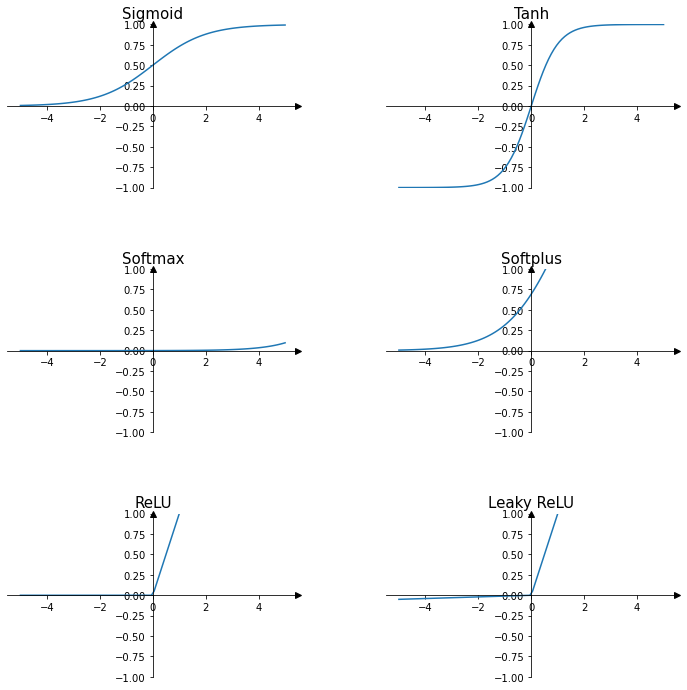

In [2]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# List of activation functions
activation_functions = [
    ('Sigmoid', keras.activations.sigmoid),
    ('Tanh', keras.activations.tanh),
    ('Softmax', tf.nn.softmax),
    ('Softplus', keras.activations.softplus),
    ('ReLU', keras.activations.relu),
    ('Leaky ReLU', keras.layers.LeakyReLU(alpha=0.01)),
]

x = np.linspace(-5, 5, 100)

# Plot each activation function in a subplot
for i, (name, activation) in enumerate(activation_functions):
    row, col = i // 2, i % 2
    ax = axs[row, col]

    # Customize the plot for each activation function
    ax.spines[["left", "bottom"]].set_position(("data", 0))
    ax.spines[["top", "right"]].set_visible(False)
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
    y = activation(x)
    ax.plot(x, y)
    ax.set_ylim([-1, 1])
    ax.set_title(name, fontsize=15)
plt.show()

#### Activation Functions $f(x)$

- **Sigmoid:**
  $$
  f(x) = \frac{1}{1 + e^{-x}} = \frac{\tanh(\frac{x}{2}) + 1}{2}
  $$

- **Tanh:**
  $$
  f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
  $$

- **Softmax:**
  $$
  f(\mathbf{x}) = \frac{e^{x}_i}{\sum^K_{j=1}e^{x_j}}
  $$

- **SoftPlus:**
  $$
  f(x) = \log(1 + e^{x})
  $$

- **ReLU (Rectifier Linear Unit):**
  $$
  f(x) = \max(0, x)
  $$

- **Leaky ReLU:**
  $$
  f(x) = \begin{cases}
    x, & \text{if } x > 0 \\
    ax, & \text{if } x \le 0
  \end{cases}
  \text{where }a\text{ is constant}
  $$


## Part 2. The Boston Housing Problem
#### This is a regression problem to predicted expected housing prices depending on parameters.
#### The dataset contains 404 training samples and 103 test samples, classified into 13 categories.

In [3]:
(train_data, train_targets), (test_data, test_targets)=(boston_housing.load_data())

### 1. Data preprocessing
#### Standardize the input to have a zero mean and unit standard deviation.

In [4]:
mean = train_data.mean(axis=0)
train_data -= mean
std  = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### 3. Building the Model
#### - Create models using `keras.Sequential()` for the following architectures:
    - Simple Perceptron (modernized with sigmoid activation)
    - Multilayer Perceptron
    - Deep Neural Networks
#### Just like lego block

In [5]:
# Perceptron using Keras Sequential API
perceptron_model = Sequential()
perceptron_model.add(Dense(1, input_dim=train_data.shape[1], activation='linear'))
# Multilayer Perceptron (MLP) using Keras Sequential API
mlp_model = Sequential()
mlp_model.add(Dense(64, input_dim=train_data.shape[1], activation='relu'))
mlp_model.add(Dense(1, activation='linear'))
# Deep Neural Network (DNN) using Keras Sequential API
dnn_model = Sequential()
dnn_model.add(Dense(64, input_dim=train_data.shape[1], activation='relu'))
dnn_model.add(Dense(128, activation='relu'))
dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(Dense(1, activation='linear'))

#### Print the model architecture!

In [6]:
perceptron_model.build(input_shape=train_data.shape) 
perceptron_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [7]:
mlp_model.build(input_shape=train_data.shape) 
mlp_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                896       
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [8]:
dnn_model.build(input_shape=train_data.shape) 
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,537
Trainable params: 17,537
Non-trainable params: 0
_________________________________________________________________


### 4. Compile the networks
#### Loss is MSE(Mean Squared Error) 
#### Optimizer is rmsprop()

In [9]:
# Compile the perceptron model
perceptron_model.compile(loss='mean_squared_error', optimizer='rmsprop')
# Compile the MLP model
mlp_model.compile(loss='mean_squared_error', optimizer='rmsprop')
# Compile the DNN model
dnn_model.compile(loss='mean_squared_error', optimizer='rmsprop')

## 5. Train the models
### Let's test 100 epochs

In [10]:
# Train the perceptron model and record the loss history
perceptron_history = perceptron_model.fit(train_data, train_targets, epochs=100, batch_size=1, verbose=1);
# Train the MLP model and record the loss history
mlp_history = mlp_model.fit(train_data, train_targets, epochs=100, batch_size=1, verbose=1);
# Train the DNN model and record the loss history
dnn_history = dnn_model.fit(train_data, train_targets, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
404/404 [==============================] - 2s 1ms/step - loss: 570.9831
Epoch 2/100
404/404 [==============================] - 0s 1ms/step - loss: 549.0970
Epoch 3/100
404/404 [==============================] - 0s 1ms/step - loss: 528.3222
Epoch 4/100
404/404 [==============================] - 0s 1ms/step - loss: 508.7114
Epoch 5/100
404/404 [==============================] - 0s 1ms/step - loss: 490.3362
Epoch 6/100
404/404 [==============================] - 0s 1ms/step - loss: 472.4318
Epoch 7/100
404/404 [==============================] - 0s 1ms/step - loss: 455.2012
Epoch 8/100
404/404 [==============================] - 0s 1ms/step - loss: 438.5029
Epoch 9/100
404/404 [==============================] - 0s 1ms/step - loss: 422.5938
Epoch 10/100
404/404 [==============================] - 0s 1ms/step - loss: 407.1241
Epoch 11/100
404/404 [==============================] - 0s 1ms/step - loss: 392.0847
Epoch 12/100
404/404 [==============================] - 0s 1ms/step - loss

### 6. Plot the loss
#### Diagnostic that!

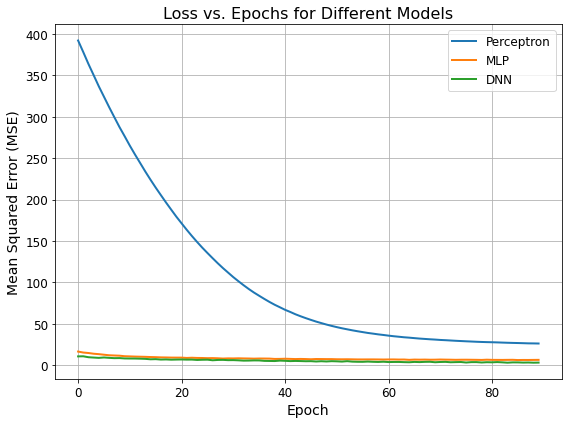

In [13]:
# Plot the loss versus epochs for all models
plt.figure(figsize=(8, 6))  # Adjust the figure size
plt.plot(perceptron_history.history['loss'][10:], label='Perceptron', linewidth=2)
plt.plot(mlp_history.history['loss'][10:], label='MLP', linewidth=2)
plt.plot(dnn_history.history['loss'][10:], label='DNN', linewidth=2)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
plt.title('Loss vs. Epochs for Different Models', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tick_params(labelsize=12)  # Increase tick label font size
plt.tight_layout()  # Adjust spacing between elements
plt.show()

#### It looks that the performance ranking is DNN > MLP > Single-layer perceptron.
#### However, the difference between DNN and MLP is very small.

## 7. Evaluate this with test data set

In [12]:
# Evaluate the perceptron model on the test data
perceptron_loss = perceptron_model.evaluate(test_data, test_targets)
print("Perceptron Loss (MSE) on Test Data:", perceptron_loss)

# Evaluate the MLP model on the test data
mlp_loss = mlp_model.evaluate(test_data, test_targets)
print("MLP Loss (MSE) on Test Data:", mlp_loss)

# Evaluate the DNN model on the test data
dnn_loss = dnn_model.evaluate(test_data, test_targets)
print("DNN Loss (MSE) on Test Data:", dnn_loss)

4/4 [==============================] - 0s 2ms/step - loss: 19.0789
Perceptron Loss (MSE) on Test Data: 19.078901290893555
4/4 [==============================] - 0s 2ms/step - loss: 15.6998
MLP Loss (MSE) on Test Data: 15.699773788452148
4/4 [==============================] - 0s 2ms/step - loss: 13.8651
DNN Loss (MSE) on Test Data: 13.865108489990234


#### When we used the test data sets, the ranking remained the same as mentioned earlier.
#### But keep in mind, this was just a simple test; we didn't dive deep into hyperparameter tuning or comprehensive analysis.